In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib import cm
from scipy.stats import multivariate_normal
from scipy.optimize import minimize
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.neighbors import KernelDensity
%matplotlib inline

# Zad 1.
Wygeneruj dane zawierające dwa komponenty z rozkładu normalnego (1d, 2d) z dowolnymi parametrami.
Wykonaj estymację gęstości za pomocą jednego rozkładu normalnego oraz wylicz BIC. 
Narysuj poziomice wy-estymowanej gęstości.

31303.8295093


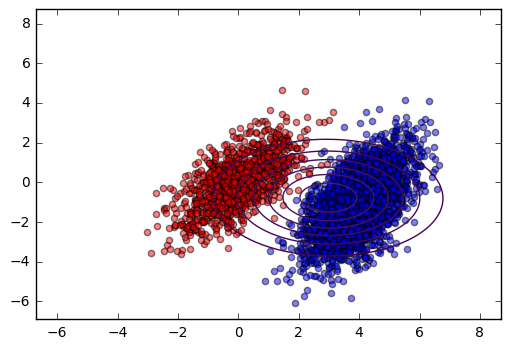

In [2]:
mean_1 = np.array([0, 0])
cov_1 = np.array([[ 0.9754901 ,  0.61711801], [ 1.02363489,  1.88378694]])

mean_2 = np.array([4, -1])
cov_2 = np.array([[ 1. , 2.], [ 0., 1.]])

n_samples_1 = 1000
n_samples_2 = 3000

samples_1 = np.random.multivariate_normal(mean_1, cov_1, n_samples_1)
samples_2 = np.random.multivariate_normal(mean_2, cov_2, n_samples_2)

samples = np.vstack((samples_1, samples_2))

sample_mean = np.mean(samples, axis=0)
sample_cov = np.cov(samples, rowvar=False)

xs = np.linspace(-6, 8, 100)
ys = np.linspace(-6, 8, 100)

xx, yy = np.meshgrid(xs, ys)
levels = np.linspace(0., 0.8, 100)

zz = mlab.bivariate_normal(xx, yy, 
                               np.sqrt(sample_cov[0, 0]), np.sqrt(sample_cov[1, 1]),
                              sample_mean[0], sample_mean[1], sample_cov[1, 0])

print(np.log(samples.shape[0]) * 5 - 2 * np.sum(np.log(multivariate_normal.pdf(samples, sample_mean, sample_cov))))

plt.scatter(samples[:n_samples_1, 0], samples[:n_samples_1, 1], c='r', alpha=0.5)
plt.scatter(samples[n_samples_1:, 0], samples[n_samples_1:, 1], c='b', alpha=0.5)
_ = plt.contour(xx, yy, zz, levels, cmap=cm.viridis)

# Zad 2.
Wygeneruj dane zawierające dwa komponenty z rozkładu normalnego (1d, 2d) z dowolnymi parametrami.
Wykonaj estymację gęstości jądrową oraz wylicz BIC. 
Narysuj poziomice wy-estymowanej gęstości.

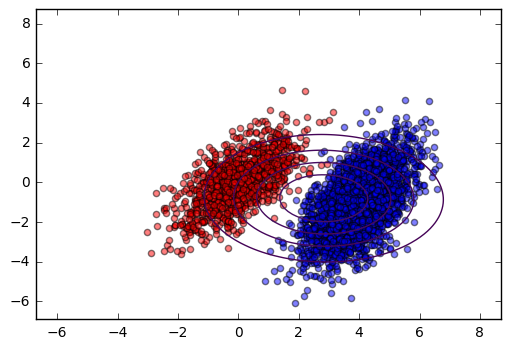

In [12]:
kde = KernelDensity()
a = kde.fit(samples).sample(1000)

mean = np.mean(a, axis=0)
cov = np.cov(a, rowvar=False)
zz = mlab.bivariate_normal(xx, yy, 
                               np.sqrt(cov[0, 0]), np.sqrt(cov[1, 1]),
                              mean[0], mean[1], cov[1, 0])
plt.scatter(samples[:n_samples_1, 0], samples[:n_samples_1, 1], c='r', alpha=0.5)
plt.scatter(samples[n_samples_1:, 0], samples[n_samples_1:, 1], c='b', alpha=0.5)
_ = plt.contour(xx, yy, zz, levels, cmap=cm.viridis)

# Zad 3.
Wygeneruj dane zawierające dwa komponenty z rozkładu normalnego (1d, 2d) z dowolnego rozkładu.
Wykonaj algorytm Gaussian Mixture Models (GMM) [link](https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm) oraz wylicz BIC. 
Zaznacz efekt klastrowania.
Narysuj poziomice wy-estymowanej gęstości.

14383.4709634


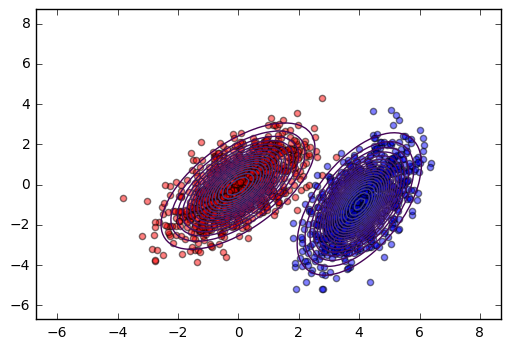

In [49]:
n_components = 2

m = GaussianMixture(n_components)
m.fit(samples)

print(m.bic(samples))

plt.scatter(samples[:n_samples_1, 0], samples[:n_samples_1, 1], c='r', alpha=0.5)
plt.scatter(samples[n_samples_1:, 0], samples[n_samples_1:, 1], c='b', alpha=0.5)

for i in range(n_components):
    zz = mlab.bivariate_normal(xx, yy, 
                               np.sqrt(m.covariances_[i][0, 0]), np.sqrt(m.covariances_[i][1, 1]),
                               m.means_[i][0], m.means_[i][1], m.covariances_[i][1, 0])
    plt.contour(xx, yy, zz, levels, cmap=cm.viridis)

# Zad 4.
Wykonaj algorytm GMM z k = 1,2,3,4,5 na danych
* [dane 1](http://ww2.ii.uj.edu.pl/~spurek/zad/EllipseGauss.txt)
* [dane 2](http://ww2.ii.uj.edu.pl/~spurek/zad/EllipseGauss2.txt)
* [dane 3](http://ww2.ii.uj.edu.pl/~spurek/zad/mouseset.txt)
* [dane 4](https://cs.joensuu.fi/sipu/datasets/unbalance.txt)

Porównaj wyniki z k-means (wizualnie).

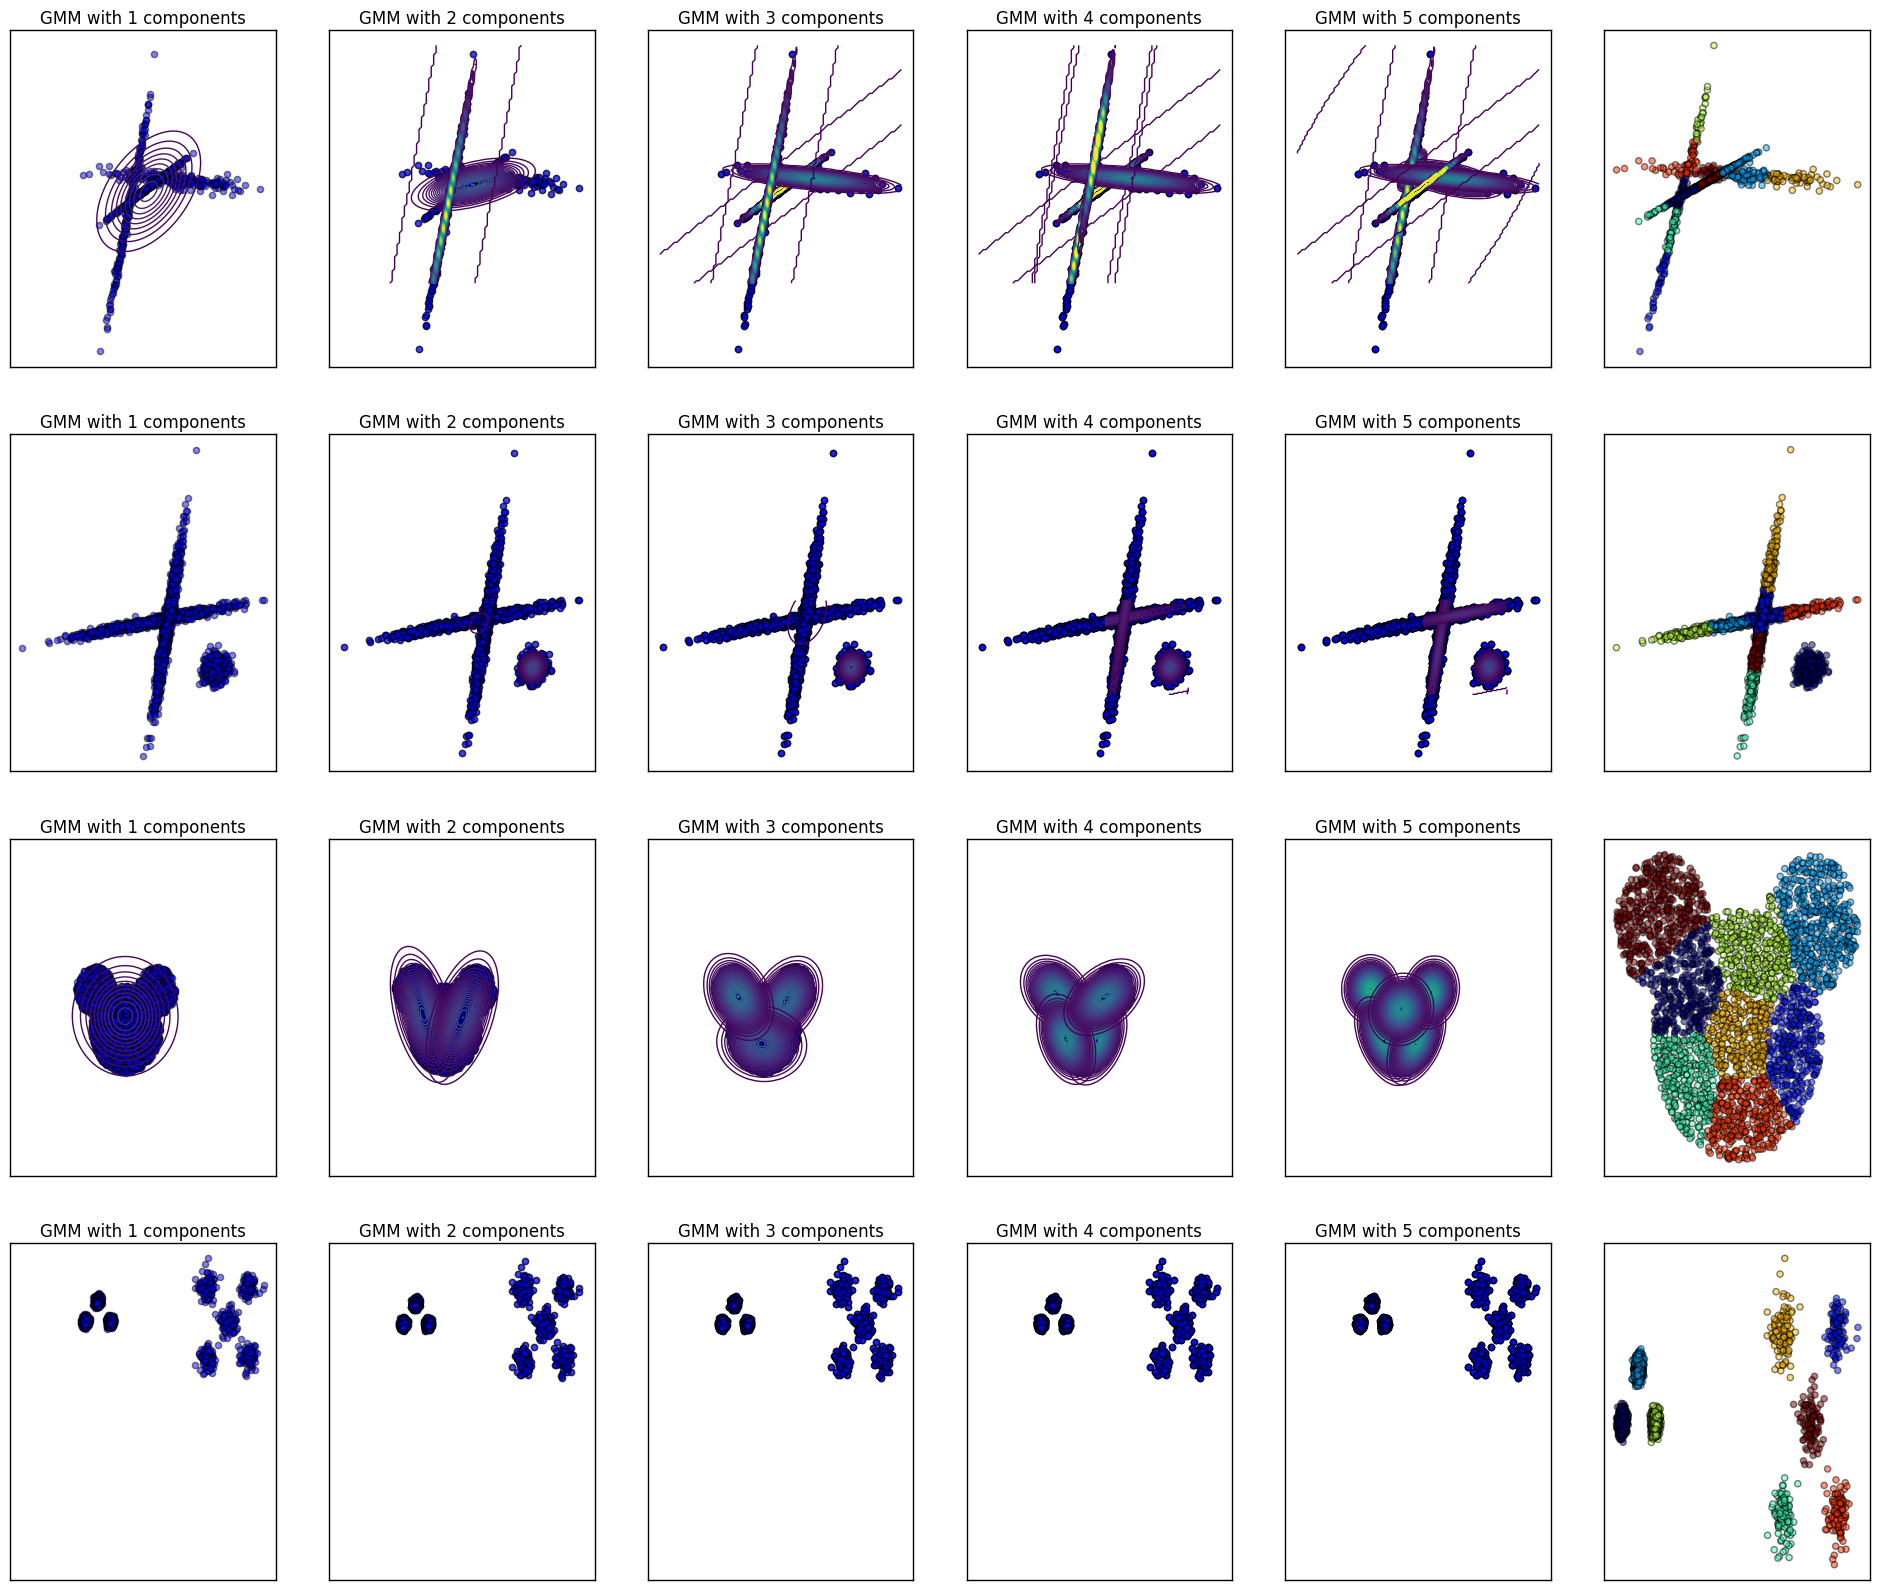

In [62]:
ellipse_1 = np.loadtxt("files/EllipseGauss.txt")
ellipse_2 = np.loadtxt("files/EllipseGauss2.txt")
mouse = np.loadtxt("files/mouseset.txt")
unb = np.loadtxt("files/unbalance.txt")

datasets = [ellipse_1, ellipse_2, mouse, unb]

fig = plt.figure(figsize=(24, 20))
for i in range(4):
    for n_components in range(5):
        #print("i " + str(i), "n_comp " + str(n_components))
        fig.add_subplot(4, 6, i * 6 + n_components + 1, xticks=[], yticks=[])
        m = GaussianMixture(n_components + 1).fit(datasets[i])
        for j in range(n_components + 1):
            xs = np.linspace(-6, 8, 100)
            ys = np.linspace(-6, 8, 100)
            xx, yy = np.meshgrid(xs, ys)
            levels = np.linspace(0., 0.8, 100)
            zz = mlab.bivariate_normal(xx, yy, 
                                       np.sqrt(m.covariances_[j][0, 0]), np.sqrt(m.covariances_[j][1, 1]),
                                       m.means_[j][0], m.means_[j][1], m.covariances_[j][1, 0])
            plt.scatter(datasets[i][:, 0], datasets[i][:, 1], alpha=0.5)
            plt.contour(xx, yy, zz, levels, cmap=cm.viridis)
            plt.title("GMM with " + str(n_components + 1) + " components")
    fig.add_subplot(4, 6, i * 6 + 5 + 1, xticks=[], yticks=[])
    K = KMeans().fit(datasets[i])
    plt.scatter(datasets[i][:, 0], datasets[i][:, 1], alpha=0.5, c=K.labels_)

# Zad 5.
Ściągnij z UCI dowolny zbiór danych.
Wykonaj algorytmy:

* opisz dane za pomocą jednego gaussa.
* wykonaj estymację gęstości metodą estymacji jądrowej.
* wykonaj Gaussian Mixture Models (GMM) z k= 2, 5, 10.
porównaj wartość BIC. 

1825.14492938


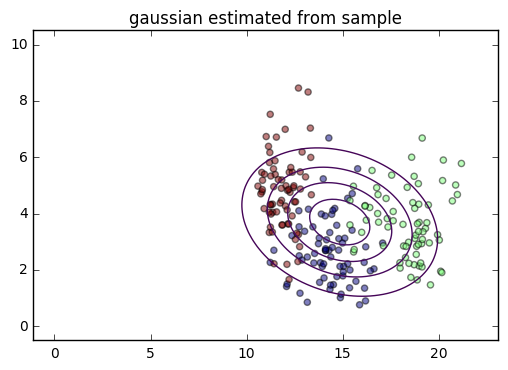

1776.79729011


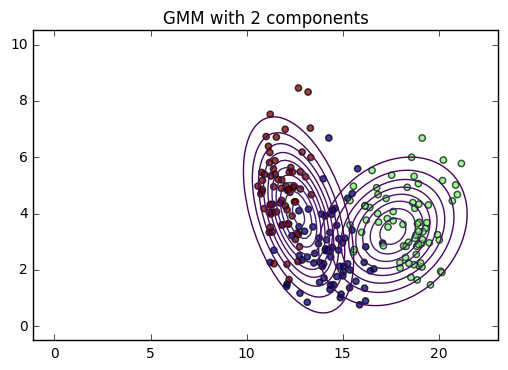

1821.22508619


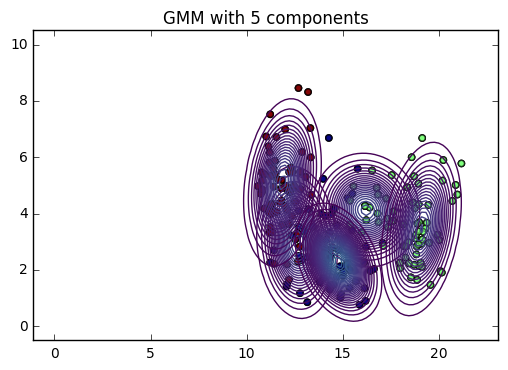

1942.21047096


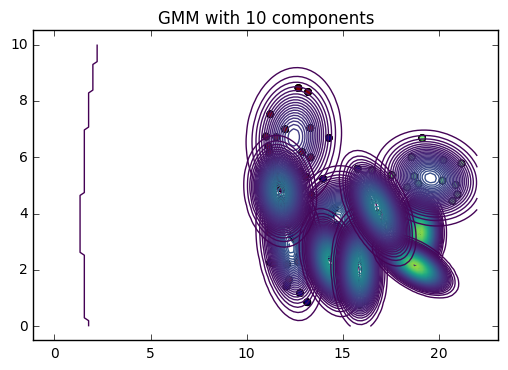

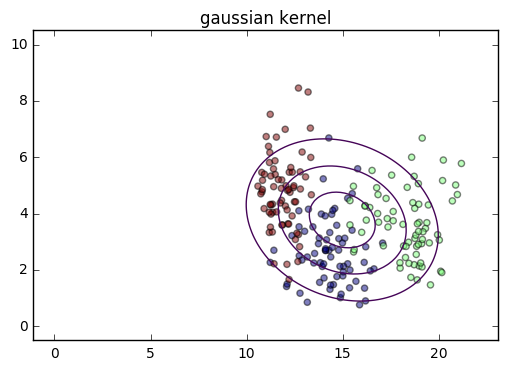

In [14]:
import urllib.request 
url = r"http://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt"

raw_data = urllib.request.urlopen(url)
dataset = np.loadtxt(raw_data)

X_seeds = dataset[:, :7]
y_seeds = dataset[:, 7]
n_classes = len(set(y_seeds))

samples_1 = X_seeds[:, 0]
samples_2 = X_seeds[:, 5]
samples_small = np.vstack((samples_1, samples_2)).T

sample_mean = np.mean(samples_small, axis=0)
sample_cov = np.cov(samples_small, rowvar=False)

xs = np.linspace(0, 22, 100)
ys = np.linspace(0, 10, 100)

xx, yy = np.meshgrid(xs, ys)
levels = np.linspace(0., 0.8, 100)

zz = mlab.bivariate_normal(xx, yy, 
                               np.sqrt(sample_cov[0, 0]), np.sqrt(sample_cov[1, 1]),
                              sample_mean[0], sample_mean[1], sample_cov[1, 0])

print(np.log(samples_small.shape[0]) * 5 - 2 * np.sum(np.log(multivariate_normal.pdf(samples_small, sample_mean, sample_cov))))

plt.scatter(samples_small[:, 0], samples_small[:, 1], alpha=0.5, c=y_seeds)
plt.contour(xx, yy, zz, levels, cmap=cm.viridis)
plt.title("gaussian estimated from sample")
plt.show()

def asd(n):
    m = GaussianMixture(n).fit(samples_small)
    print(m.bic(samples_small))
    for j in range(n):
        zz = mlab.bivariate_normal(xx, yy, 
                                   np.sqrt(m.covariances_[j][0, 0]), 
                                   np.sqrt(m.covariances_[j][1, 1]),
                                   m.means_[j][0], m.means_[j][1], 
                                   m.covariances_[j][1, 0])
        plt.scatter(samples_small[:, 0], samples_small[:, 1], alpha=0.5, c=y_seeds)
        plt.contour(xx, yy, zz, levels, cmap=cm.viridis)
    plt.title("GMM with " + str(n) + " components")
    plt.show()
        
asd(2)
asd(5)
asd(10)

kde = KernelDensity()
a = kde.fit(samples_small).sample(1000)

mean = np.mean(a, axis=0)
cov = np.cov(a, rowvar=False)
zz = mlab.bivariate_normal(xx, yy, 
                               np.sqrt(cov[0, 0]), np.sqrt(cov[1, 1]),
                              mean[0], mean[1], cov[1, 0])
plt.scatter(samples_small[:, 0], samples_small[:, 1], alpha=0.5, c=y_seeds)
plt.title("gaussian kernel")
_ = plt.contour(xx, yy, zz, levels, cmap=cm.viridis)